In [1]:
import sys
import os
sys.path.insert(1, '/storage/home/nxt5197/work/530_stellar_atmospheres/lib/')
from statmospheres import Partition
from statmospheres import Phi
from statmospheres import NIST_Phi
from statmospheres import Kappa_Hff_2e
from statmospheres import Kappa_Hbf_2e
from statmospheres import Kappa_Hff
from statmospheres import Kappa_Hbf
from statmospheres import NIST_Kappa_Total
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../lib/plt_format.mplstyle')
from astropy import units as u
from astropy import constants as const

### Partition Function
$U_r \equiv \sum_{s} g_{r,s} e^{-\chi_{r,s}/kT}$ <br>
### Saha Equation
$\Big[ \frac{n_c}{n_i} \Big]_{\text{LTE}} = \frac{1}{N_e} \frac{2 g_c}{g_i} \Big( \frac{2 \pi m_e kT}{h^2} \Big)^{3/2} e^{-\chi_{ci}/kT} $ <br>

In [2]:
os.chdir('/storage/home/nxt5197/work/530_stellar_atmospheres/lib')

In [3]:
Partition_table=pd.read_csv('RepairedPartitionFunctions.txt',delimiter=r"\s+", header=None)
PTable=Partition_table.rename(columns={0: 'Element', 1: 0.2,2: 0.4,3: 0.6,4: 0.8,5: 1.0,6: 1.2,7: 1.4,8: 1.6,9: 1.8,10: 2.0,11: 'log g0'})

In [4]:
T = 5776*u.K
element = 'H'

Partition(PTable,element,T)

0.301

In [5]:
NistIonizTable = pd.read_csv('nist_ioniz.txt',delimiter='\t',header=None)
NistIonizTable=NistIonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy'})
NistIonizTable['Element'] = NistIonizTable['Element'].str.strip()
IonizTable = pd.read_fwf('ioniz.txt',header=None)
IonizTable=IonizTable.rename(columns={0: 'Atomic_Number', 1: 'Element',2: 'Atomic_Weight',3: 'Ionization_Energy_1',4: 'Ionization_Energy_2',5: 'Ionization_Energy_3'})

In [95]:
element='H'
T = 5776*u.K
ionization_level = 1
Phi(IonizTable,PTable,element,ionization_level,T),NIST_Phi(NistIonizTable,PTable,element,T)

(<Quantity 0.00069092>, <Quantity 0.0006931>)

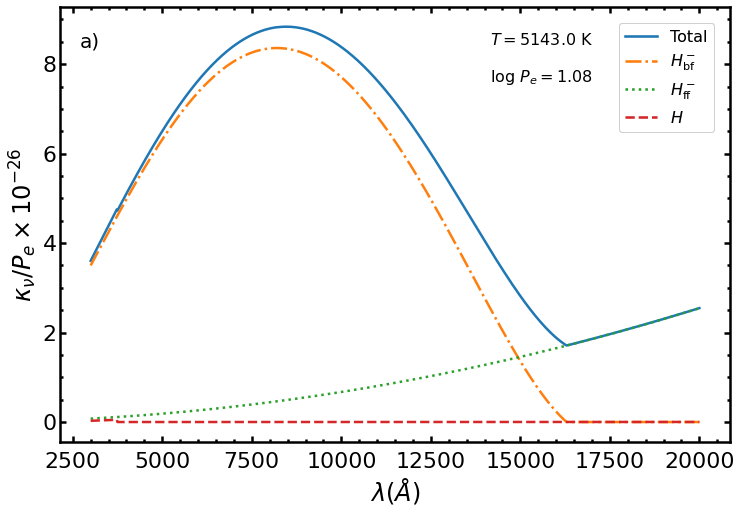

In [93]:
df=NistIonizTable
P_e = 10**1.08
T = 5143*u.K
lam=np.linspace(3000,20000,1000)*u.Angstrom

fig, ax = plt.subplots(figsize=(12,8))
x=lam/u.Angstrom
theta=5040*u.K/T
X_lam = 1.2398*10**4/(x)
y1=Kappa_Hbf_2e(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y2=Kappa_Hff_2e(P_e,T,lam)/P_e
y3=Kappa_Hbf(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y4=Kappa_Hff(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y5=NIST_Kappa_Total(df,PTable,P_e,T,lam)
plt.plot(x,y5/10**-26,linestyle='-',label=r'Total')
plt.plot(x,y1/10**-26,linestyle='-.',label=r'$H^-_\mathrm{bf}$')
plt.plot(x,y2/10**-26,linestyle='dotted',label=r'$H^-_\mathrm{ff}$')
plt.plot(x,(y3+y4)/10**-26,linestyle='--',label=r'$H$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
legend1 = plt.legend(loc=1)
ax.annotate('a)',xy=(20,410), xycoords='axes points',
            size=20, ha='left', va='top')
leg = r'$T = $'+f'{T}\n\n'+r'log $P_e = $'+f'{np.log10(P_e)}'
ax.annotate(leg, xy=(430, 410), xycoords='axes points',
            size=16, ha='left', va='top')
ax.add_artist(legend1)
plt.show()

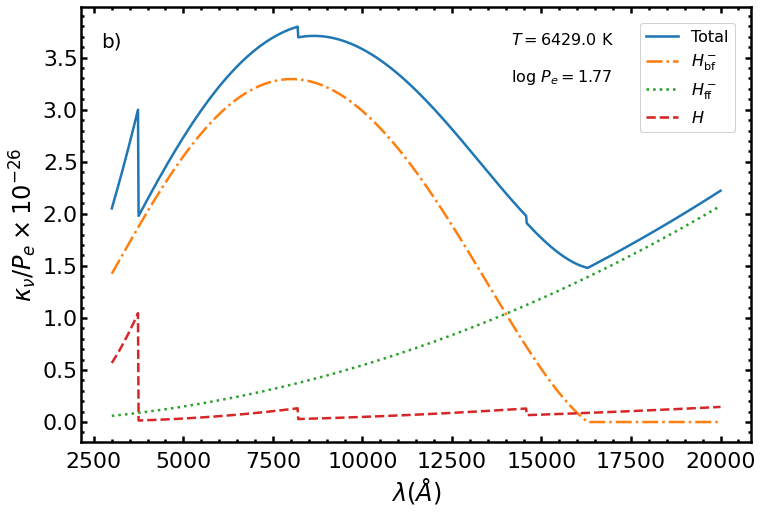

In [92]:
df=NistIonizTable
P_e = 10**1.77
T = 6429*u.K
lam=np.linspace(3000,20000,1000)*u.Angstrom

fig, ax = plt.subplots(figsize=(12,8))
x=lam/u.Angstrom
theta=5040*u.K/T
X_lam = 1.2398*10**4/(x)
y1=Kappa_Hbf_2e(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y2=Kappa_Hff_2e(P_e,T,lam)/P_e
y3=Kappa_Hbf(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y4=Kappa_Hff(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y5=NIST_Kappa_Total(df,PTable,P_e,T,lam)
y5=y2+y1+y3+y4
plt.plot(x,y5/10**-26,linestyle='-',label=r'Total')
plt.plot(x,y1/10**-26,linestyle='-.',label=r'$H^-_\mathrm{bf}$')
plt.plot(x,y2/10**-26,linestyle='dotted',label=r'$H^-_\mathrm{ff}$')
plt.plot(x,(y3+y4)/10**-26,linestyle='--',label=r'$H$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
legend1 = plt.legend(loc=1)
ax.annotate('b)',xy=(20,410), xycoords='axes points',
            size=20, ha='left', va='top')
leg = r'$T = $'+f'{T}\n\n'+r'log $P_e = $'+f'{np.log10(P_e)}'
ax.annotate(leg, xy=(430, 410), xycoords='axes points',
            size=16, ha='left', va='top')
ax.add_artist(legend1)
plt.show()

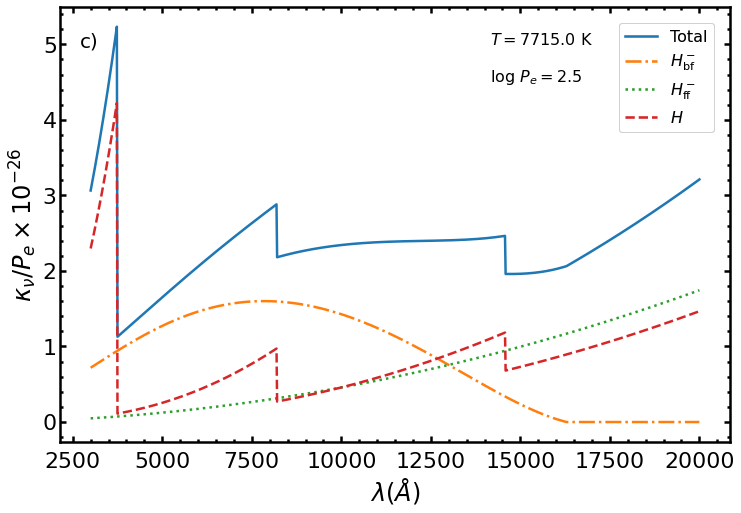

In [90]:
df=NistIonizTable
P_e = 10**2.5
T = 7715*u.K
lam=np.linspace(3000,20000,1000)*u.Angstrom

fig, ax = plt.subplots(figsize=(12,8))
x=lam/u.Angstrom
theta=5040*u.K/T
X_lam = 1.2398*10**4/(x)
y1=Kappa_Hbf_2e(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y2=Kappa_Hff_2e(P_e,T,lam)/P_e
y3=Kappa_Hbf(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y4=Kappa_Hff(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y5=NIST_Kappa_Total(df,PTable,P_e,T,lam)
y5=y2+y1+y3+y4
plt.plot(x,y5/10**-26,linestyle='-',label=r'Total')
plt.plot(x,y1/10**-26,linestyle='-.',label=r'$H^-_\mathrm{bf}$')
plt.plot(x,y2/10**-26,linestyle='dotted',label=r'$H^-_\mathrm{ff}$')
plt.plot(x,(y3+y4)/10**-26,linestyle='--',label=r'$H$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
legend1 = plt.legend(loc=1)
ax.annotate('c)',xy=(20,410), xycoords='axes points',
            size=20, ha='left', va='top')
leg = r'$T = $'+f'{T}\n\n'+r'log $P_e = $'+f'{np.log10(P_e)}'
ax.annotate(leg, xy=(430, 410), xycoords='axes points',
            size=16, ha='left', va='top')
ax.add_artist(legend1)
plt.show()

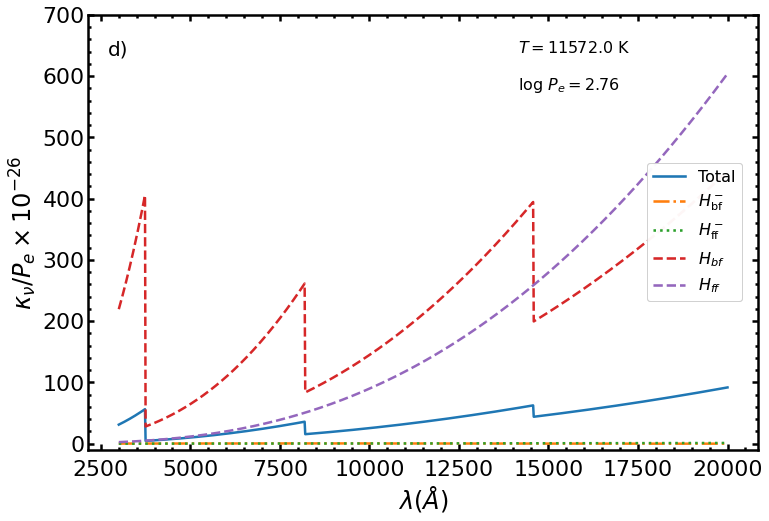

In [94]:
df=NistIonizTable
P_e = 10**2.76
T = 11572*u.K
lam=np.linspace(3000,20000,1000)*u.Angstrom

# Using the Phi function as described in Gray's equation 8.18
fig, ax = plt.subplots(figsize=(12,8))
y1=Kappa_Hbf_2e(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y2=Kappa_Hff_2e(P_e,T,lam)/P_e
y3=Kappa_Hbf(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y4=Kappa_Hff(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
x=lam/u.Angstrom
y5=NIST_Kappa_Total(df,PTable,P_e,T,lam)
plt.plot(x,y5/10**-26,linestyle='-',label=r'Total')
plt.plot(x,y1/10**-26,linestyle='-.',label=r'$H^-_\mathrm{bf}$')
plt.plot(x,y2/10**-26,linestyle='dotted',label=r'$H^-_\mathrm{ff}$')
plt.plot(x,y3/10**-26,linestyle='--',label=r'$H_{bf}$')
plt.plot(x,y4/10**-26,linestyle='--',label=r'$H_{ff}$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
legend1 = plt.legend(loc=7)
ax.annotate('d)',xy=(20,410), xycoords='axes points',
            size=20, ha='left', va='top')
leg = r'$T = $'+f'{T}\n\n'+r'log $P_e = $'+f'{np.log10(P_e)}'
ax.annotate(leg, xy=(430, 410), xycoords='axes points',
            size=16, ha='left', va='top')
ax.add_artist(legend1)
plt.ylim(-10,700)
plt.show()

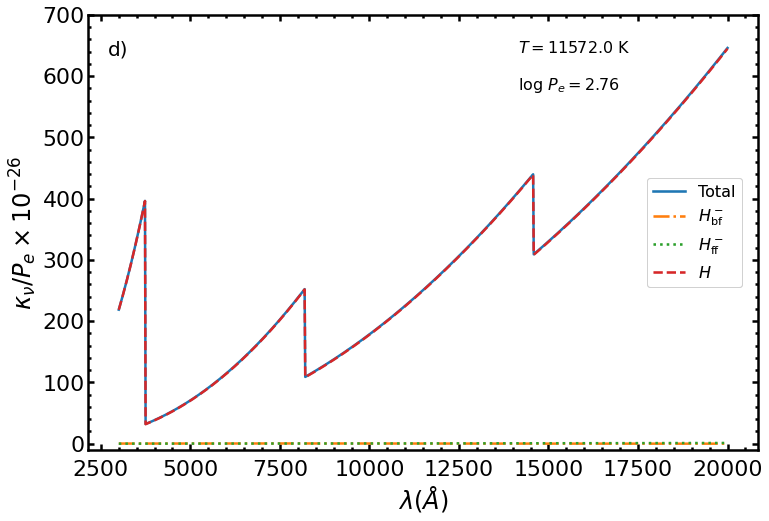

In [91]:
df=NistIonizTable
P_e = 10**2.76
T = 11572*u.K
lam=np.linspace(3000,20000,1000)*u.Angstrom

# Not using Phi since Gray's plots in fig 8.5 are per hydrogen atom, not per particle.
fig, ax = plt.subplots(figsize=(12,8))
x=lam/u.Angstrom
theta=5040*u.K/T
X_lam = 1.2398*10**4/(x)
y1=Kappa_Hbf_2e(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y2=Kappa_Hff_2e(P_e,T,lam)/P_e
y3=Kappa_Hbf(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y4=Kappa_Hff(P_e,T,lam)/P_e*(1-10**(-theta*X_lam))
y5=y2+y1+y3+y4
plt.plot(x,y5/10**-26,linestyle='-',label=r'Total')
plt.plot(x,y1/10**-26,linestyle='-.',label=r'$H^-_\mathrm{bf}$')
plt.plot(x,y2/10**-26,linestyle='dotted',label=r'$H^-_\mathrm{ff}$')
plt.plot(x,(y3+y4)/10**-26,linestyle='--',label=r'$H$')
# plt.plot(x,y4/10**-26,linestyle='--',label=r'$H_{ff}$')
plt.xlabel(r'$\lambda (\AA)$')
plt.ylabel(r'$\kappa_\nu / P_e \times 10^{-26}$')
legend1 = plt.legend(loc=7)
ax.annotate('d)',xy=(20,410), xycoords='axes points',
            size=20, ha='left', va='top')
leg = r'$T = $'+f'{T}\n\n'+r'log $P_e = $'+f'{np.log10(P_e)}'
ax.annotate(leg, xy=(430, 410), xycoords='axes points',
            size=16, ha='left', va='top')
ax.add_artist(legend1)
plt.ylim(-10,700)
plt.show()